In [1]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
import pymongo

In [6]:
#몽고 주소
host = '0.0.0.0'
port = 27017

In [7]:
#수집한 뉴스데이터 110만건의 데이터 -> 몽고DB
conn = pymongo.MongoClient(host=host, port=port)
db = conn.get_database('news')  ## db name
collection = db.get_collection('marine')

In [8]:
#해양, 수산 분야에 해당되는 뉴스들을 찾기
news_marine = list(
    collection.find({'service_type': 'NEWS', '$text': {'$search': '해운 항만 조선 해양 해운업 조선업 해양수산'}}, {'_id': 0, 'content': 1}))
news_content = [news['content'] for news in news_marine]
news_data = pd.DataFrame(news_content)

print('MongoDB Connected.')

MongoDB Connected.


In [9]:
conn.close()
print('MongoDB Closed.')

MongoDB Closed.


In [10]:
news_data.head(10)
len(news_data)

169125

In [11]:
news_train = news_data.rename(columns={0: 'news'})
news_train['news'][:30]

0     이주의 주식시장은? 반도체·코로나 백신 이슈 지속... 정치 테마주 순환적인 강세 ...
1     1975년 미국 코닥사의 엔지니어 스티븐 세슨은 세계 최초로 디지털카메라를 발명했습...
2     1975년 미국 코닥사의 엔지니어 스티븐 세슨은 세계 최초로 디지털카메라를 발명했습...
3     1975년 미국 코닥사의 엔지니어 스티븐 세슨은 세계 최초로 디지털카메라를 발명했습...
4     국제 정세 속 한국은? 마입성 쌍로지상(馬入城 雙路之像)!…亥는 쌍해종환(雙亥終還)...
5     현대자동차의 미국시장 판매가 8월 이후 일정 기간 주춤할 가능성이 나온다. 다만 S...
6     자금력·인력 풍부해 M&A 시장에 절대적 영향력… 산업 구조조정, 기업 지배구조 재...
7     자금력·인력 풍부해 M&A 시장에 절대적 영향력… 산업 구조조정, 기업 지배구조 재...
8     자금력·인력 풍부해 M&A 시장에 절대적 영향력… 산업 구조조정, 기업 지배구조 재...
9     [한국대학신문 김의진 기자] 코로나19 확산 여파로 올해 대학 신입생 모집 입시박람...
10    국민의힘 홍준표 의원이 5일 오후 대구 그랜드호텔에서 열린 매일 탑 리더스 아카데미...
11    포항지역 시민사회단체 탐방(1)\n포항지역발전협의회\n허상호 포항지역발전협의회 회장...
12    기사내용 요약\n군대문화·모병제 전환 등 변화까지 하세월\n병역기피하면 처벌…막대한...
13    [미리보는 이데일리 신문]“기업 직접 지원…신용위기 전염 막아라” 메인메뉴 바로가기...
14    아버지 잘 만나…다 차려진 밥상 ‘덥석’\n[일요시사 취재1팀] 김태일 기자 = 박...
15    관련기사 문갑식 "박근혜 대통령 탄핵 불러온 '언론의 난', 최악의 세 칼럼"......
16    > 산업 > 일반 -->\n[해운업계 '환경규제' 시대-③] ECA 확대 등 연안 ...
17    참여와혁신이 주말과 휴일에 나온 산업과 노동 분야 뉴스를 모아 독자 여러분께

In [12]:
news_train['news'][0]

'이주의 주식시장은? 반도체·코로나 백신 이슈 지속... 정치 테마주 순환적인 강세 이어져, 스푸트니크V 국내 도입 가능성에 관련주 꿈틀\n19일 코스피에서는 대유플러스, 대한제당우, 대덕전자1우, 크라운제과우, 대덕1우, 크라운해태홀딩스우가 상한가를 달성했다.\n코스닥에서는 에이비프로바이오, 피에스케이홀딩스가 상한가를 달성했다.\n대유플러스는 19일 전기차 충전기 제조사 시그넷 EV와 업무협약을 체결하고, 충전기 판매 및 충전사업에 본격적으로 나선다고 밝히며 급등했다.\n윤석열 전 검찰총장이 차기 대권 양자대결에서 이재명 경기도지사를 20%포인트 가량 압도적으로 앞선다는 여론조사 결과가 19일 나왔다.\n여론조사업체 리얼미터가 YTN 의뢰로 지난 16일 전국 1011명을 대상으로 실시한 차기 대선주자 선호도 조사(95% 신뢰수준에 표본오차는 ±3.1%포인트)에 따르면, 윤 전 총장과 이재명 경기도지사는 양자 가상 대결에서 각각 51.1%, 32.3%의 지지율을 기록했다. 윤 전 총장은 이낙연 전 더불어민주당 대표와의 양자 대결에서도 51.6%대30.1%로 앞섰다.\n지역별로는 윤 전 총장이 모든 지역에서 앞선 것으로 나타났다. 민주당 텃밭인 광주·전라에서도 윤 전 총장은 41.4%로 이 지사 40.8%를 앞섰다. 연령별로는 40대를 제외한 나머지 모든 연령대에서 윤 전 총장 지지율이 높았다.\n윤 전 총장은 민주당 이낙연 전 대표와의 양자 대결에서도 51.6% 대 30.1%로 우세했다. 이 지사와의 양자대결과 마찬가지로 40대에서만 이 전 대표가 42.1% 대 33.3%로 앞섰다.\n응답자들은 `만약 내년 대통령 선거에서 두 후보가 맞붙는다면 누구에게 투표하겠는가`라는 질문을 받고 이같이 답했다. 지역과 성별, 이념 성향을 불문하고 윤 전 총장의 비중이 높았다. 다만 연령대별로 봤을 때 40대가 유일하게 여권 주자를 더 지지하는 것으로 나타났다. 양자 대결에서 40대 지지율을 보면 이 지사가 49.9%, 윤 전 총장이 31.8%였다. 이 전 대표와 윤 전 총

In [13]:
#전처리
news_text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣|a-zA-Z]", "", news_train['news'][0])

In [14]:
print(news_text)

이주의주식시장은반도체코로나백신이슈지속정치테마주순환적인강세이어져스푸트니크V국내도입가능성에관련주꿈틀일코스피에서는대유플러스대한제당우대덕전자우크라운제과우대덕우크라운해태홀딩스우가상한가를달성했다코스닥에서는에이비프로바이오피에스케이홀딩스가상한가를달성했다대유플러스는일전기차충전기제조사시그넷EV와업무협약을체결하고충전기판매및충전사업에본격적으로나선다고밝히며급등했다윤석열전검찰총장이차기대권양자대결에서이재명경기도지사를포인트가량압도적으로앞선다는여론조사결과가일나왔다여론조사업체리얼미터가YTN의뢰로지난일전국명을대상으로실시한차기대선주자선호도조사신뢰수준에표본오차는포인트에따르면윤전총장과이재명경기도지사는양자가상대결에서각각의지지율을기록했다윤전총장은이낙연전더불어민주당대표와의양자대결에서도대로앞섰다지역별로는윤전총장이모든지역에서앞선것으로나타났다민주당텃밭인광주전라에서도윤전총장은로이지사를앞섰다연령별로는대를제외한나머지모든연령대에서윤전총장지지율이높았다윤전총장은민주당이낙연전대표와의양자대결에서도대로우세했다이지사와의양자대결과마찬가지로대에서만이전대표가대로앞섰다응답자들은만약내년대통령선거에서두후보가맞붙는다면누구에게투표하겠는가라는질문을받고이같이답했다지역과성별이념성향을불문하고윤전총장의비중이높았다다만연령대별로봤을때대가유일하게여권주자를더지지하는것으로나타났다양자대결에서대지지율을보면이지사가윤전총장이였다이전대표와윤전총장대결에선각각결과가나왔다이조사의표본오차는신뢰수준에포인트다자세한내용은중앙선거여론조사심의위원회홈페이지를참조하면된다이같은소식에윤석열관련주로불리는종목들이강세를보였다대한제당은하광열사외이사가윤전총장과서울대법대동문이라는사실이퍼지면서관련주로엮였다대한제당우는상한가를기록했다윤영달회장이파평윤씨아니냐는소문이돌고있는크라운제과가급등했고크라운제과우크라운해태홀딩스우도상한가를달성했다대덕전자가플립칩볼그리드어레이FCBGA기판가격폭등에급등세보였다대덕전자우대덕우는상한가를달성했다PCB수요가급증하고있지만공급이그만큼안되며FCBGA기판가격이폭등하고있는것이상승세의이유로보인다전세계적인반도체부족현상이심화되고있는가운데삼성전자가다음달미국과한국에반도체관련역대급투자계획을내놓을것이란관측

In [15]:
#형태소 분석(토큰화)
okt = Okt()
news_text = okt.morphs(news_text, stem=True)
print(news_text)

['이', '주의', '주식시장', '은', '반도체', '코로나', '백신', '이슈', '지속', '정치', '테마주', '순환', '적', '인', '강세', '이어지다', '스푸트니크', 'V', '국내', '도입', '가능성', '에', '관련', '주', '꿈틀', '일', '코스피', '에서는', '대', '유플러스', '대', '한', '제', '당우', '대덕', '전자', '우', '크라운', '제과', '우대', '덕우', '크라운', '해태', '홀딩스', '우', '가상하다', '달성', '하다', '코스닥', '에서는', '에이', '비프', '로', '바이', '오피', '에스케이', '홀딩스', '가상하다', '달성', '하다', '유플러스', '는', '일전', '기차', '충전기', '제조', '사시', '그', '넷', 'EV', '오다', '업무', '협약', '을', '체결', '하고', '충전기', '판매', '및', '충전', '사업', '에', '본격', '적', '으로', '나선', '다', '고', '밝히다', '급등', '하다', '윤석', '열전', '검찰총장', '이차', '기대권', '양자', '대결', '에서', '이재명', '경기도', '지사', '를', '포인트', '가량', '압도', '적', '으로', '앞서다', '여론조사', '결과', '가일', '나오다', '여론조사', '업체', '리얼미터', '가', 'YTN', '의뢰', '로', '지난', '일', '전국', '명', '을', '대상', '으로', '실시', '한', '차기', '대선', '주자', '선호', '도', '조사', '신뢰수준', '에', '표본', '오차', '는', '포인트', '에', '따르다', '윤전', '총장', '과', '이재명', '경기도', '지사', '는', '양자', '가상', '대결', '에서', '각', '각의', '지지율', '을', '기록', '하다', '윤전', '총장', '은', '이낙연', '

In [19]:
#불용어 처리
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','적','답','등','을','를','자','로','과','와','이다','하다','에'])
clean_news = [token for token in news_text if not token in stop_words and len(token) > 1]
clean_news

['주의',
 '주식시장',
 '반도체',
 '코로나',
 '백신',
 '이슈',
 '지속',
 '정치',
 '테마주',
 '순환',
 '강세',
 '이어지다',
 '스푸트니크',
 '국내',
 '도입',
 '가능성',
 '관련',
 '꿈틀',
 '코스피',
 '에서는',
 '유플러스',
 '당우',
 '대덕',
 '전자',
 '크라운',
 '제과',
 '우대',
 '덕우',
 '크라운',
 '해태',
 '홀딩스',
 '가상하다',
 '달성',
 '코스닥',
 '에서는',
 '에이',
 '비프',
 '바이',
 '오피',
 '에스케이',
 '홀딩스',
 '가상하다',
 '달성',
 '유플러스',
 '일전',
 '기차',
 '충전기',
 '제조',
 '사시',
 'EV',
 '오다',
 '업무',
 '협약',
 '체결',
 '하고',
 '충전기',
 '판매',
 '충전',
 '사업',
 '본격',
 '으로',
 '나선',
 '밝히다',
 '급등',
 '윤석',
 '열전',
 '검찰총장',
 '이차',
 '기대권',
 '양자',
 '대결',
 '에서',
 '이재명',
 '경기도',
 '지사',
 '포인트',
 '가량',
 '압도',
 '으로',
 '앞서다',
 '여론조사',
 '결과',
 '가일',
 '나오다',
 '여론조사',
 '업체',
 '리얼미터',
 'YTN',
 '의뢰',
 '지난',
 '전국',
 '대상',
 '으로',
 '실시',
 '차기',
 '대선',
 '주자',
 '선호',
 '조사',
 '신뢰수준',
 '표본',
 '오차',
 '포인트',
 '따르다',
 '윤전',
 '총장',
 '이재명',
 '경기도',
 '지사',
 '양자',
 '가상',
 '대결',
 '에서',
 '각의',
 '지지율',
 '기록',
 '윤전',
 '총장',
 '이낙연',
 '더불다',
 '민주당',
 '대표',
 '와의',
 '양자',
 '대결',
 '에서도',
 '대로',
 '앞서다',
 '지역별',
 '로는',
 '윤전',
 '총장',
 '이모',
 '지역',
 '

In [20]:
#처리 후 결과
len(clean_news)

2291

Counter({'급등': 35, '관련': 31, '되다': 27, '달성': 26, '주로': 25, '으로': 22, '코스닥': 21, '에서': 21, 'KODEX': 20, '있다': 18, '바이오': 17, '에서는': 15, '종목': 15, '코스피': 14, '윤전': 14, '총장': 14, '반도체': 12, '코로나': 12, '홀딩스': 12, '포인트': 12, '버스': 12, '상한': 11, '거래': 11, '증권': 11, '백신': 10, '스푸트니크': 10, '국내': 10, '크라운': 10, '하고': 10, '불리다': 10, '한국': 10, '산업': 10, '시스': 10, '이상하다': 10, '생산': 10, '노루': 10, '에스': 10, '이슈': 9, '가상하다': 9, '밝히다': 9, '보다': 9, '윤석열': 9, '상승': 9, '마시스': 9, '선물': 9, '트론': 9, '전자': 8, '제과': 8, '소식': 8, '가르다': 8, '흥국화재': 8, '끌다': 8, '상위': 8, '아이디': 8, '레버리지': 8, '티케': 8, '러시아': 8, '대덕': 7, '오다': 7, '나오다': 7, '대표': 7, '보이다': 7, '프로': 7, '관심': 7, '특별하다': 7, '케미칼': 7, '풀이': 7, '유플러스': 6, '에이': 6, '대결': 6, '이재명': 6, '받다': 6, '서울': 6, '투자': 6, '알려지다': 6, '희림': 6, '구리': 6, '없다': 6, '이수앱지스': 6, '강세': 5, '도입': 5, '양자': 5, '지사': 5, '앞서다': 5, '따르다': 5, '기록': 5, '아니다': 5, '가격': 5, '자회사': 5, '종료': 5, '애니플러스': 5, '판타지오': 5, '파마': 5, '주가': 5, '편입': 5, '딕스': 5, '페인트': 5, '컨소시엄': 5, '화전': 5, '포스코강판':

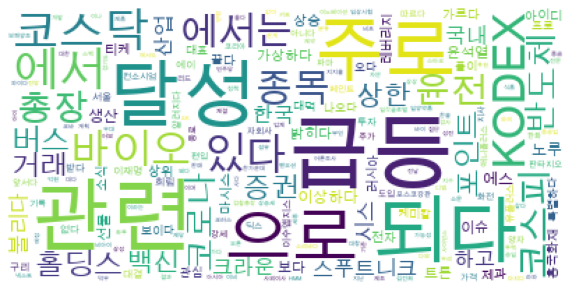

In [22]:
#word cloud로 만들어봅시다.
from collections import Counter

count = Counter(clean_news)
print(count)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 가장 출현 빈도수가 높은 100개의 단어를 선정
ranked_tags = count.most_common(200)

wc = WordCloud(font_path='/Fonts/Arial Unicode.ttf', background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(ranked_tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 문제!
1. 불용어처리가 완전히 되지않음
2. 형태소 분석시 단어(명사)를 들고 와야하나, 동사 및 형용사도 추출
3. LDA 학습 및 Word2Vec에서 수정
[한국어 불용어 리스트 사이트](https://www.ranks.nl/stopwords/korean)
